In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

In [4]:
# Now we store the datasets into a dataframe of our own
with open("sample.csv") as sample:
    sample_df = pd.read_csv(sample) 
with open("sample_variables.csv") as variable:
  variables_df = pd.read_csv(variable)

In [74]:
display(variables_df)

,Variable Name,Question it relates to
0,timestamp,Timestamp
1,age,What is your age? (In years)
2,gender,What is your gender?
3,sex_orient,What is your sexual orientation?
4,domicile,What's your hometown?
5,current_home,Where do you currently live?
6,encounter_check,Have you ever had a sexual encounter?
7,first_age,At what age did you have your first sexual enc...
8,first_consent,Was that encounter consensual?
9,first_nat,What was the nature of your first sexual encou...


In [6]:
display(sample_df)

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,conceive_check,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,Would you like to share any additional info?
0,2-15-2023 19:27:37,23.0,Male,Heterosexual / Straight,"Jaunpur , UP","Varanasi , UP",No,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,No,Yes,"Friends and partner, You regularly read about it","HIV, Syphillis, Gonorhhea, Hepatitis",NaN,NaN
1,2-15-2023 19:29:42,21.0,Male,Heterosexual / Straight,"Biratnagar, Nepal","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,NaN,No,Yes,No,No,"Social Media, Friends and partner","HIV, Gonorhhea, Hepatitis, Urinary tract infec...",NaN,NaN
2,2-15-2023 19:34:24,20.0,Male,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,17.0,Yes,Penetrative,...,No,No,No,Yes,No,No,Friends and partner,"HIV, Hepatitis, Bacterial transmission through...",NaN,No comments it's personal ??
3,2-15-2023 19:34:46,21.0,Male,Heterosexual / Straight,"Aligarh, UP","Varanasi, UP",Yes,17.0,Yes,"less than penetration, included something oral",...,No,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Herpes, Hepatitis, ...",NaN,"no, nothing useful to your ressearch\n"
4,2-15-2023 19:38:17,21.0,Male,Heterosexual / Straight,"Sidhharth nagar, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Yes,Maybe,"Social Media, Friends and partner","HIV, Hepatitis, Urinary tract infections occur...",NaN,\nI'm filling this form \nBut really I was una...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-26-2023 21:56:06,20.0,Male,Heterosexual / Straight,"Bhadohi,UP","Varanasi,UP",No,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Yes,Yes,"Social Media, Friends and partner, You regular...",Urinary tract infections occurring from transm...,NaN,NaN
303,2-26-2023 22:16:39,21.0,Male,Heterosexual / Straight,"Bankura, WB","Kolkata, WB",No,NaN,NaN,NaN,...,NaN,NaN,No,Yes,Yes,No,"Social Media, Friends and partner","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,NaN
304,2-27-2023 17:36:29,22.0,Female,Heterosexual / Straight,GORAKHPUR UP,"Varanasi, UP",No,NaN,NaN,NaN,...,NaN,NaN,No,Yes,No,Yes,Social Media,"HIV, Urinary tract infections occurring from t...",NaN,NaN
305,03-05-23 0:08,23.0,Female,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,21.0,Yes,"Penetrative, Oral, Genital simulation by hand",...,No,Yes,No,Yes,Yes,Yes,"Friends and partner, You regularly read about it","HIV, Chlamydia, Hepatitis, Urinary tract infec...",NaN,NaN


In [7]:
sample_df.columns

Index(['timestamp', 'age', 'gender', 'sex_orient', 'domicile', 'current_home',
       'encounter_check', 'first_age', 'first_consent', 'first_nat',
       'first_contra', 'contra_source', 'total_no', 'current_no',
       'current_freq', 'current_contra', 'skip_freq', 'skip_reason',
       'alcohol_check', 'conceive_check', 'fluids_check', 'oral_aware',
       'preg_aware', 'cut_aware', 'menstrual_aware', 'safe_sex_source',
       'risk_count', 'Unnamed: 27',
       'Would you like to share any additional info?'],
      dtype='object')

In [8]:
sample_df = sample_df.drop(['Would you like to share any additional info?' ], axis=1)

In [9]:
sample_df.columns


Index(['timestamp', 'age', 'gender', 'sex_orient', 'domicile', 'current_home',
       'encounter_check', 'first_age', 'first_consent', 'first_nat',
       'first_contra', 'contra_source', 'total_no', 'current_no',
       'current_freq', 'current_contra', 'skip_freq', 'skip_reason',
       'alcohol_check', 'conceive_check', 'fluids_check', 'oral_aware',
       'preg_aware', 'cut_aware', 'menstrual_aware', 'safe_sex_source',
       'risk_count', 'Unnamed: 27'],
      dtype='object')

In [10]:
sample_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        307 non-null    object 
 1   age              307 non-null    float64
 2   gender           307 non-null    object 
 3   sex_orient       307 non-null    object 
 4   domicile         307 non-null    object 
 5   current_home     307 non-null    object 
 6   encounter_check  307 non-null    object 
 7   first_age        143 non-null    float64
 8   first_consent    141 non-null    object 
 9   first_nat        140 non-null    object 
 10  first_contra     141 non-null    object 
 11  contra_source    125 non-null    object 
 12  total_no         140 non-null    float64
 13  current_no       139 non-null    float64
 14  current_freq     142 non-null    object 
 15  current_contra   142 non-null    object 
 16  skip_freq        133 non-null    float64
 17  skip_reason     

In [75]:
sample_df.sample(5)

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state
196,2-19-2023 20:02:12,20.0,Male,Heterosexual / Straight,"Purulia, WB","Purulia, WB",No,NaN,NaN,NaN,...,NaN,Maybe,Yes,No,Yes,Social Media,HIV,NaN,WB,WB
58,2-16-2023 12:07:56,21.0,Male,Heterosexual / Straight,"Muzaffarpur, Bihari","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,"Social Media, Friends and partner","HIV, Syphillis, Gonorhhea, Chlamydia, Hepatiti...",NaN,Bihar,UP
40,2-16-2023 0:29:45,23.0,Male,Heterosexual / Straight,"Purulia, WB","Purulia, WB",Yes,17.0,Yes,"Oral, Genital simulation by hand",...,Maybe,Yes,Yes,No,Yes,"Social Media, Friends and partner","HIV, Hepatitis",NaN,WB,WB
129,2-17-2023 18:31:18,24.0,Male,Heterosexual / Straight,"Kolkata, WB","Kolkata, WB",Yes,23.0,Yes,Penetrative,...,Maybe,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea",NaN,WB,WB
258,2-21-2023 0:36:01,21.0,Female,Heterosexual / Straight,"Varanasi, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,No,Maybe,Social Media,"HIV, Syphillis, Gonorhhea, HPV, Urinary tract ...",NaN,UP,UP


In [11]:
sample_df.describe()

,age,first_age,total_no,current_no,skip_freq,Unnamed: 27
count,307.000000,143.000000,140.000000,139.000000,133.000000,0.0
mean,20.824104,18.489510,3.335714,0.870504,2.736842,NaN
std,1.543489,2.142353,9.577860,0.866732,3.729276,NaN
min,17.000000,10.000000,1.000000,0.000000,0.000000,NaN
25%,20.000000,17.000000,1.000000,0.000000,0.000000,NaN
50%,21.000000,19.000000,2.000000,1.000000,1.000000,NaN
75%,21.000000,20.000000,3.000000,1.000000,5.000000,NaN
max,35.000000,23.000000,111.000000,7.000000,10.000000,NaN


In [12]:
(sample_df["encounter_check"].value_counts("Yes"))*314

No     168.762215
Yes    145.237785
Name: encounter_check, dtype: float64

We see that number of responses is different in every column

In [13]:
(sample_df["encounter_check"]=="Yes")

0      False
1      False
2       True
3       True
4      False
       ...  
302    False
303    False
304    False
305     True
306     True
Name: encounter_check, Length: 307, dtype: bool

In [14]:
print(sample_df[sample_df["encounter_check"]=="Yes" ][["encounter_check","first_age"]])

    encounter_check  first_age
2               Yes       17.0
3               Yes       17.0
5               Yes       20.0
18              Yes       21.0
21              Yes       19.0
..              ...        ...
297             Yes       19.0
299             Yes       20.0
300             Yes       20.0
305             Yes       21.0
306             Yes       19.0

[142 rows x 2 columns]


Now we need to group by state and also convert responses into frequency


In [15]:
sample_df[["domicile", "current_home"]]

,domicile,current_home
0,"Jaunpur , UP","Varanasi , UP"
1,"Biratnagar, Nepal","Varanasi, UP"
2,"Lucknow, UP","Varanasi, UP"
3,"Aligarh, UP","Varanasi, UP"
4,"Sidhharth nagar, UP","Varanasi, UP"
...,...,...
302,"Bhadohi,UP","Varanasi,UP"
303,"Bankura, WB","Kolkata, WB"
304,GORAKHPUR UP,"Varanasi, UP"
305,"Lucknow, UP","Varanasi, UP"


In [16]:
sample_df["domicile"] = sample_df["domicile"].astype("str")

In [17]:
sample_df.replace("delhi", "Delhi", inplace=True)
sample_df.replace("New Delhi", "Delhi", inplace=True)
sample_df.replace("new delhi", "Delhi", inplace=True)
sample_df.replace("New delhi", "Delhi", inplace=True)
sample_df.replace("U.P", "UP", inplace=True)
sample_df.replace("U.P.", "UP", inplace=True)
sample_df.replace("Uttar Pradesh", "UP", inplace=True)
sample_df.replace("Uttar pradesh", "UP", inplace=True)
sample_df.replace("up", "UP", inplace=True)
sample_df.replace("uttar pradesh", "UP", inplace=True)
sample_df.replace("West Bengal", "WB", inplace=True)
sample_df.replace("West bengal", "WB", inplace=True)
sample_df.replace("west bengal", "WB", inplace=True)
sample_df.replace("W.B", "WB", inplace=True)
sample_df.replace("W.B.", "WB", inplace=True)
sample_df.replace("HR", "Haryana", inplace=True)
sample_df.replace("GJ", "Gujrat", inplace=True)
sample_df.replace("CG", "Chattisgarh", inplace=True)
sample_df.replace("MH", "Maharashtra", inplace=True)
sample_df.replace("maharashtra", "Maharashtra", inplace=True)
sample_df.replace("Madhya Pradesh", "MP", inplace=True)
sample_df.replace("Madhya pradesh", "MP", inplace=True)
sample_df.replace("madhya pradesh", "MP", inplace=True)
sample_df.replace("UK", "Uttarakhand", inplace=True)
sample_df.replace("uk", "Uttarakhand", inplace=True)
sample_df.replace("bihar", "Bihar", inplace=True)
sample_df.replace("jharkhand", "Jharkhand", inplace=True)

In [18]:
sample_df.replace("Delhi", "x, Delhi", inplace=True)

In [19]:
#sample_df["domicile_state"] = sample_df[sample_df["domicile"] == "Delhi"]["domicile_state"] = "Delhi"
sample_df["domicile_state"] = sample_df["domicile"].str.split(",").str[1]
#sample_df[sample_df["current_home"] == "Delhi"]["current_state"] = "Delhi"
sample_df["current_state"] = sample_df["current_home"].str.split(",").str[1]


In [20]:
sample_df

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state
0,2-15-2023 19:27:37,23.0,Male,Heterosexual / Straight,"Jaunpur , UP","Varanasi , UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,No,Yes,"Friends and partner, You regularly read about it","HIV, Syphillis, Gonorhhea, Hepatitis",NaN,UP,UP
1,2-15-2023 19:29:42,21.0,Male,Heterosexual / Straight,"Biratnagar, Nepal","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,Yes,No,No,"Social Media, Friends and partner","HIV, Gonorhhea, Hepatitis, Urinary tract infec...",NaN,Nepal,UP
2,2-15-2023 19:34:24,20.0,Male,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,17.0,Yes,Penetrative,...,No,No,Yes,No,No,Friends and partner,"HIV, Hepatitis, Bacterial transmission through...",NaN,UP,UP
3,2-15-2023 19:34:46,21.0,Male,Heterosexual / Straight,"Aligarh, UP","Varanasi, UP",Yes,17.0,Yes,"less than penetration, included something oral",...,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Herpes, Hepatitis, ...",NaN,UP,UP
4,2-15-2023 19:38:17,21.0,Male,Heterosexual / Straight,"Sidhharth nagar, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Maybe,"Social Media, Friends and partner","HIV, Hepatitis, Urinary tract infections occur...",NaN,UP,UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-26-2023 21:56:06,20.0,Male,Heterosexual / Straight,"Bhadohi,UP","Varanasi,UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,"Social Media, Friends and partner, You regular...",Urinary tract infections occurring from transm...,NaN,UP,UP
303,2-26-2023 22:16:39,21.0,Male,Heterosexual / Straight,"Bankura, WB","Kolkata, WB",No,NaN,NaN,NaN,...,NaN,No,Yes,Yes,No,"Social Media, Friends and partner","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,WB,WB
304,2-27-2023 17:36:29,22.0,Female,Heterosexual / Straight,GORAKHPUR UP,"Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,Yes,No,Yes,Social Media,"HIV, Urinary tract infections occurring from t...",NaN,NaN,UP
305,03-05-23 0:08,23.0,Female,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,21.0,Yes,"Penetrative, Oral, Genital simulation by hand",...,Yes,No,Yes,Yes,Yes,"Friends and partner, You regularly read about it","HIV, Chlamydia, Hepatitis, Urinary tract infec...",NaN,UP,UP


In [21]:
df_obj = sample_df.select_dtypes(['object'])
sample_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [22]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        307 non-null    object 
 1   age              307 non-null    float64
 2   gender           307 non-null    object 
 3   sex_orient       307 non-null    object 
 4   domicile         307 non-null    object 
 5   current_home     307 non-null    object 
 6   encounter_check  307 non-null    object 
 7   first_age        143 non-null    float64
 8   first_consent    141 non-null    object 
 9   first_nat        140 non-null    object 
 10  first_contra     141 non-null    object 
 11  contra_source    125 non-null    object 
 12  total_no         140 non-null    float64
 13  current_no       139 non-null    float64
 14  current_freq     142 non-null    object 
 15  current_contra   142 non-null    object 
 16  skip_freq        133 non-null    float64
 17  skip_reason     

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Displayong the entire DataFrame
    print(sample_df) 

              timestamp   age             gender               sex_orient  \
0    2-15-2023 19:27:37  23.0               Male  Heterosexual / Straight   
1    2-15-2023 19:29:42  21.0               Male  Heterosexual / Straight   
2    2-15-2023 19:34:24  20.0               Male  Heterosexual / Straight   
3    2-15-2023 19:34:46  21.0               Male  Heterosexual / Straight   
4    2-15-2023 19:38:17  21.0               Male  Heterosexual / Straight   
5    2-15-2023 19:40:17  20.0               Male  Heterosexual / Straight   
6    2-15-2023 19:40:43  20.0               Male  Heterosexual / Straight   
7    2-15-2023 19:41:05  21.0               Male  Heterosexual / Straight   
8    2-15-2023 19:42:52  20.0               Male  Heterosexual / Straight   
9    2-15-2023 19:43:23  21.0               Male  Heterosexual / Straight   
10   2-15-2023 19:47:41  19.0               Male  Heterosexual / Straight   
11   2-15-2023 20:01:03  21.0             Female                 Bisexual   

In [24]:
sample_df[sample_df["domicile_state"] =="Delhi"].count()

timestamp          14
age                14
gender             14
sex_orient         14
domicile           14
current_home       14
encounter_check    14
first_age           7
first_consent       7
first_nat           7
first_contra        7
contra_source       6
total_no            7
current_no          6
current_freq        7
current_contra      7
skip_freq           7
skip_reason         6
alcohol_check       7
conceive_check      7
fluids_check        7
oral_aware         14
preg_aware         14
cut_aware          14
menstrual_aware    14
safe_sex_source    14
risk_count         14
Unnamed: 27         0
domicile_state     14
current_state      13
dtype: int64

In [25]:
sample_df.replace("Bihari", "Bihar", inplace = True)

In [26]:
sample_df.groupby("current_state").count()

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,conceive_check,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state
current_state,,,,,,,,,,,,,,,,,,,,,
Bihar,3,3,3,3,3,3,3,1,1,1,...,1,1,3,3,3,3,3,3,0,3
Chattisgarh,5,5,5,5,5,5,5,2,2,2,...,2,2,5,5,5,5,5,5,0,5
Delhi,23,23,23,23,23,23,23,13,13,13,...,12,13,23,23,23,23,23,23,0,22
Haryana,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,0,1
Himachal Pradesh,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,0,1
Jharkhand,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,2
Karnataka,9,9,9,9,9,9,9,3,3,3,...,3,3,9,9,9,9,9,9,0,9
Kerala,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,0,1
MP,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,2


In [27]:
sample_df.groupby("domicile_state").count()

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,conceive_check,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,current_state
domicile_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,3,3,3,3,3,3,3,1,1,1,...,1,1,3,3,3,3,3,3,0,2
Assam,3,3,3,3,3,3,3,1,1,1,...,1,1,3,3,3,3,3,3,0,3
Bihar,20,20,20,20,20,20,20,6,6,6,...,6,6,20,20,20,20,20,20,0,19
Chattisgarh,8,8,8,8,8,8,8,4,4,4,...,4,4,8,8,8,8,8,8,0,8
Delhi,14,14,14,14,14,14,14,7,7,7,...,7,7,14,14,14,14,14,14,0,13
Gujrat,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,0,1
Haryana,4,4,4,4,4,4,4,2,2,2,...,2,2,4,4,4,4,4,4,0,4
Jharkhand,19,19,19,19,19,19,19,9,9,8,...,9,8,19,19,19,19,19,19,0,19
Karnataka,4,4,4,4,4,4,4,0,0,0,...,0,0,4,4,4,4,4,4,0,4


In [28]:
india_sample_df = sample_df.copy(deep=True)
sample_df = sample_df[sample_df["current_state"].isin(["WB", "UP"])]
sample_df

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state
0,2-15-2023 19:27:37,23.0,Male,Heterosexual / Straight,"Jaunpur , UP","Varanasi , UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,No,Yes,"Friends and partner, You regularly read about it","HIV, Syphillis, Gonorhhea, Hepatitis",NaN,UP,UP
1,2-15-2023 19:29:42,21.0,Male,Heterosexual / Straight,"Biratnagar, Nepal","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,Yes,No,No,"Social Media, Friends and partner","HIV, Gonorhhea, Hepatitis, Urinary tract infec...",NaN,Nepal,UP
2,2-15-2023 19:34:24,20.0,Male,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,17.0,Yes,Penetrative,...,No,No,Yes,No,No,Friends and partner,"HIV, Hepatitis, Bacterial transmission through...",NaN,UP,UP
3,2-15-2023 19:34:46,21.0,Male,Heterosexual / Straight,"Aligarh, UP","Varanasi, UP",Yes,17.0,Yes,"less than penetration, included something oral",...,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Herpes, Hepatitis, ...",NaN,UP,UP
4,2-15-2023 19:38:17,21.0,Male,Heterosexual / Straight,"Sidhharth nagar, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Maybe,"Social Media, Friends and partner","HIV, Hepatitis, Urinary tract infections occur...",NaN,UP,UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-26-2023 21:56:06,20.0,Male,Heterosexual / Straight,"Bhadohi,UP","Varanasi,UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,"Social Media, Friends and partner, You regular...",Urinary tract infections occurring from transm...,NaN,UP,UP
303,2-26-2023 22:16:39,21.0,Male,Heterosexual / Straight,"Bankura, WB","Kolkata, WB",No,NaN,NaN,NaN,...,NaN,No,Yes,Yes,No,"Social Media, Friends and partner","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,WB,WB
304,2-27-2023 17:36:29,22.0,Female,Heterosexual / Straight,GORAKHPUR UP,"Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,Yes,No,Yes,Social Media,"HIV, Urinary tract infections occurring from t...",NaN,NaN,UP
305,03-05-23 0:08,23.0,Female,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,21.0,Yes,"Penetrative, Oral, Genital simulation by hand",...,Yes,No,Yes,Yes,Yes,"Friends and partner, You regularly read about it","HIV, Chlamydia, Hepatitis, Urinary tract infec...",NaN,UP,UP


Study the demography

State wise dstribution

In [29]:
sample_df.groupby("domicile_state").count().sort_values(by = "timestamp", ascending=False)

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,conceive_check,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,current_state
domicile_state,,,,,,,,,,,,,,,,,,,,,
UP,93,93,93,93,93,93,93,41,40,41,...,39,40,93,93,93,93,93,93,0,93
WB,77,77,77,77,77,77,77,42,41,40,...,41,41,77,77,77,77,77,77,0,77
Bihar,16,16,16,16,16,16,16,5,5,5,...,5,5,16,16,16,16,16,16,0,16
Jharkhand,15,15,15,15,15,15,15,7,7,6,...,7,6,15,15,15,15,15,15,0,15
Uttarakhand,4,4,4,4,4,4,4,0,0,0,...,0,0,4,4,4,4,4,4,0,4
MP,4,4,4,4,4,4,4,3,3,3,...,3,3,4,4,4,4,4,4,0,4
Delhi,4,4,4,4,4,4,4,2,2,2,...,2,2,4,4,4,4,4,4,0,4
Maharashtra,3,3,3,3,3,3,3,2,2,2,...,2,2,3,3,3,3,3,3,0,3
Haryana,2,2,2,2,2,2,2,1,1,1,...,1,1,2,2,2,2,2,2,0,2


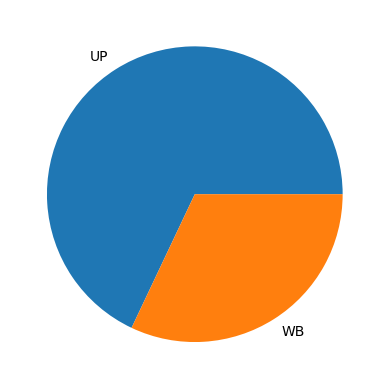

In [30]:
labels = sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].head(8).index
plt.pie(sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].head(8), labels=labels)
plt.show()


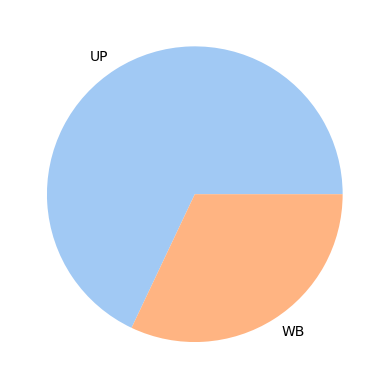

In [31]:
color = sns.color_palette("pastel")
labels = sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].head(8).index
plt.pie(sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].head(8), labels=labels, colors =color)
plt.show()


In [32]:
fig = px.pie(sample_df, values =sample_df.groupby("domicile_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"], names = sample_df.groupby("domicile_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].index, title = "Top states and their represtation in our sample",)
fig.show()

In [33]:
fig = px.pie(sample_df, values =sample_df.groupby("domicile_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"], names = sample_df.groupby("domicile_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].index, title = "Top states and their represtation in our sample", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [34]:
fig = px.bar(sample_df, x = sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].index, y= sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"])
fig.show()

In [35]:
sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,conceive_check,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state
current_state,,,,,,,,,,,,,,,,,,,,,
UP,157,157,157,157,157,157,157,67,65,66,...,65,65,157,157,157,157,157,157,0,156
WB,74,74,74,74,74,74,74,40,40,38,...,39,39,74,74,74,74,74,74,0,74


In [36]:
fig = px.pie(sample_df, values =sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"], names = sample_df.groupby("current_state").count().sort_values(by = "timestamp", ascending=False)["timestamp"].index, title = "Top states and their represtation in our sample",)
fig.show()

Why are number of states not the same? And why isnt delhi there?

In [37]:
sample_df[sample_df["current_state"] == "Delhi"]

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state


Sex distribution

In [38]:
print(sample_df.groupby("gender").count()["timestamp"])

gender
Female                88
Male                 142
Prefer not to say      1
Name: timestamp, dtype: int64


In [39]:
(sample_df[["domicile_state","gender"]].groupby(by= ["gender", "domicile_state"])).count()

Empty DataFrame
Columns: []
Index: [(Female, Assam), (Female, Bihar), (Female, Chattisgarh), (Female, Delhi), (Female, Haryana), (Female, Jharkhand), (Female, MP), (Female, Odisha), (Female, Tamil Nadu), (Female, UP), (Female, Uttarakhand), (Female, WB), (Male, Andhra Pradesh), (Male, Bihar), (Male, Chattisgarh), (Male, Delhi), (Male, Gujrat), (Male, Jharkhand), (Male, Karnataka), (Male, MP), (Male, Maharashtra), (Male, Nepal), (Male, Odisha), (Male, Punjab), (Male, Telangana), (Male, UP), (Male, Uttarakhand), (Male, WB), (Prefer not to say, Bihar)]

In [40]:
print(sample_df.groupby('domicile_state')['gender'].value_counts())

domicile_state  gender           
Andhra Pradesh  Male                  1
Assam           Female                1
Bihar           Male                  9
                Female                6
                Prefer not to say     1
Chattisgarh     Female                1
                Male                  1
Delhi           Female                3
                Male                  1
Gujrat          Male                  1
Haryana         Female                2
Jharkhand       Male                  9
                Female                6
Karnataka       Male                  1
MP              Female                2
                Male                  2
Maharashtra     Male                  3
Nepal           Male                  1
Odisha          Female                1
                Male                  1
Punjab          Male                  1
Tamil Nadu      Female                1
Telangana       Male                  1
UP              Male                 60
      

In [41]:
pd.crosstab(sample_df['domicile_state'], sample_df['gender']).stack().reset_index()

,domicile_state,gender,0
0,Andhra Pradesh,Female,0
1,Andhra Pradesh,Male,1
2,Andhra Pradesh,Prefer not to say,0
3,Assam,Female,1
4,Assam,Male,0
5,Assam,Prefer not to say,0
6,Bihar,Female,6
7,Bihar,Male,9
8,Bihar,Prefer not to say,1
9,Chattisgarh,Female,1


In [42]:
table = pd.pivot_table(sample_df, values = ["gender"], index = ["current_state"], columns=sample_df['gender'], aggfunc="count")
table.replace(np.nan, 0, inplace=True)
table

gender                        
gender        Female  Male Prefer not to say
current_state                               
UP              58.0  98.0               1.0
WB              30.0  44.0               0.0

In [43]:
table = pd.pivot_table(sample_df, values = ["gender"], index = ["current_state"], columns=sample_df['gender'], aggfunc="count")
table.replace(np.nan, 0, inplace=True)
table

gender                        
gender        Female  Male Prefer not to say
current_state                               
UP              58.0  98.0               1.0
WB              30.0  44.0               0.0

In [44]:
sample_df[sample_df["sex_orient"] == "Straight"]

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state


In [45]:
sample_df.loc[136,"sex_orient"] = "Heterosexual / Straight"

In [46]:
table = pd.pivot_table(sample_df, values = ["sex_orient"], index = ["current_state"], columns=sample_df['sex_orient'], aggfunc="count")
table.replace(np.nan, 0, inplace=True)
table

sex_orient                                                    \
sex_orient       Asexual Bisexual Heterosexual / Straight Homosexual Ladki   
current_state                                                                
UP                   3.0     11.0                   135.0        5.0   1.0   
WB                   0.0      0.0                    71.0        3.0   0.0   

                         
sex_orient    Pansexual  
current_state            
UP                  2.0  
WB                  0.0

In [47]:
table = pd.pivot_table(sample_df, values = ["sex_orient"], index = ["current_state", "gender"], columns=sample_df['sex_orient'], aggfunc="count")
table.replace(np.nan, 0, inplace=True)
table

sex_orient                                   \
sex_orient                         Asexual Bisexual Heterosexual / Straight   
current_state gender                                                          
UP            Female                   2.0      7.0                    45.0   
              Male                     1.0      4.0                    89.0   
              Prefer not to say        0.0      0.0                     1.0   
WB            Female                   0.0      0.0                    30.0   
              Male                     0.0      0.0                    41.0   

                                                            
sex_orient                      Homosexual Ladki Pansexual  
current_state gender                                        
UP            Female                   2.0   0.0       2.0  
              Male                     3.0   1.0       0.0  
              Prefer not to say        0.0   0.0       0.0  
WB            Female                   0.0   0.0       0.0  
              Male                     3.0   0.0       0.0

In [48]:
table = pd.pivot_table(sample_df, values = ["encounter_check"], index = ["current_state", "gender"], columns=sample_df['encounter_check'], aggfunc="count")
table.replace(np.nan, 0, inplace=True)
table

encounter_check      
encounter_check                              No   Yes
current_state gender                                 
UP            Female                       34.0  24.0
              Male                         56.0  42.0
              Prefer not to say             1.0   0.0
WB            Female                        8.0  22.0
              Male                         26.0  18.0

Now let us study habits

In [49]:
sample_df[sample_df["encounter_check"] == "Yes"].groupby("gender")["first_age"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,46.0,18.652174,1.864491,12.0,18.0,19.0,20.0,21.0
Male,60.0,18.633333,2.299349,12.0,17.0,19.0,20.0,23.0


So median is 19, college years, so after moving out to college has an influence.

so lets make 2 groups, one who moved out and ones who dont

In [50]:
stayed_df = sample_df[sample_df["domicile"].str.split(",").str[0] == sample_df["current_home"].str.split(",").str[0]]
stayed_df

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state
6,2-15-2023 19:40:43,20.0,Male,Heterosexual / Straight,"Varanasi, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Maybe,No,"Social Media, Friends and partner","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,UP,UP
13,2-15-2023 20:03:37,22.0,Male,Heterosexual / Straight,"Varanasi, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,Social Media,"HIV, Hepatitis, Urinary tract infections occur...",NaN,UP,UP
14,2-15-2023 20:15:06,21.0,Male,Heterosexual / Straight,"Allahabad, UP","Allahabad, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,School/ College level sex education in books,"HIV, Syphillis, Hepatitis, Urinary tract infec...",NaN,UP,UP
19,2-15-2023 20:24:04,22.0,Male,Heterosexual / Straight,"Varanasi, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,No,Yes,No,"School/ College level sex education in books, ...",HIV,NaN,UP,UP
22,2-15-2023 20:25:59,19.0,Female,Homosexual,"Varanasi,UP","Varanasi,UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,You regularly read about it,"HIV, Urinary tract infections occurring from t...",NaN,UP,UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2-25-2023 21:34:39,19.0,Female,Heterosexual / Straight,"Varanasi , UP","Varanasi , UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Gonorhhea, Herpes, Hepatitis, Urinary tra...",NaN,UP,UP
277,2-25-2023 21:42:28,20.0,Female,Heterosexual / Straight,"varanasi,UP","varanasi,UP",No,NaN,NaN,NaN,...,NaN,No,Yes,Yes,Yes,School/ College level sex education in books,"HIV, HPV, Chlamydia, Herpes, Urinary tract inf...",NaN,UP,UP
291,2-26-2023 11:30:25,23.0,Male,Heterosexual / Straight,"Varanasi, UP","Varanasi, UP",Yes,22.0,Yes,"Oral, Genital simulation by hand",...,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,UP,UP
295,2-26-2023 21:04:33,21.0,Female,Heterosexual / Straight,"Varanasi, UP","Varanasi,UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,School/ College level sex education in books,"HIV, Syphillis, Gonorhhea, Herpes, Urinary tra...",NaN,UP,UP


In [51]:
moved_df = sample_df[sample_df["domicile"].str.split(",").str[0] != sample_df["current_home"].str.split(",").str[0]]
moved_df

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state
0,2-15-2023 19:27:37,23.0,Male,Heterosexual / Straight,"Jaunpur , UP","Varanasi , UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,No,Yes,"Friends and partner, You regularly read about it","HIV, Syphillis, Gonorhhea, Hepatitis",NaN,UP,UP
1,2-15-2023 19:29:42,21.0,Male,Heterosexual / Straight,"Biratnagar, Nepal","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,Yes,No,No,"Social Media, Friends and partner","HIV, Gonorhhea, Hepatitis, Urinary tract infec...",NaN,Nepal,UP
2,2-15-2023 19:34:24,20.0,Male,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,17.0,Yes,Penetrative,...,No,No,Yes,No,No,Friends and partner,"HIV, Hepatitis, Bacterial transmission through...",NaN,UP,UP
3,2-15-2023 19:34:46,21.0,Male,Heterosexual / Straight,"Aligarh, UP","Varanasi, UP",Yes,17.0,Yes,"less than penetration, included something oral",...,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Herpes, Hepatitis, ...",NaN,UP,UP
4,2-15-2023 19:38:17,21.0,Male,Heterosexual / Straight,"Sidhharth nagar, UP","Varanasi, UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Maybe,"Social Media, Friends and partner","HIV, Hepatitis, Urinary tract infections occur...",NaN,UP,UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-26-2023 21:56:06,20.0,Male,Heterosexual / Straight,"Bhadohi,UP","Varanasi,UP",No,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Yes,"Social Media, Friends and partner, You regular...",Urinary tract infections occurring from transm...,NaN,UP,UP
303,2-26-2023 22:16:39,21.0,Male,Heterosexual / Straight,"Bankura, WB","Kolkata, WB",No,NaN,NaN,NaN,...,NaN,No,Yes,Yes,No,"Social Media, Friends and partner","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,WB,WB
304,2-27-2023 17:36:29,22.0,Female,Heterosexual / Straight,GORAKHPUR UP,"Varanasi, UP",No,NaN,NaN,NaN,...,NaN,No,Yes,No,Yes,Social Media,"HIV, Urinary tract infections occurring from t...",NaN,NaN,UP
305,03-05-23 0:08,23.0,Female,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,21.0,Yes,"Penetrative, Oral, Genital simulation by hand",...,Yes,No,Yes,Yes,Yes,"Friends and partner, You regularly read about it","HIV, Chlamydia, Hepatitis, Urinary tract infec...",NaN,UP,UP


In [52]:
moved_df.describe()

,age,first_age,total_no,current_no,skip_freq,Unnamed: 27
count,158.000000,69.000000,67.000000,68.000000,65.000000,0.0
mean,20.658228,18.289855,3.029851,0.882353,2.969231,NaN
std,1.677016,2.058708,3.446431,1.058433,3.828223,NaN
min,17.000000,12.000000,1.000000,0.000000,0.000000,NaN
25%,20.000000,17.000000,1.000000,0.000000,0.000000,NaN
50%,21.000000,18.000000,2.000000,1.000000,1.000000,NaN
75%,21.000000,20.000000,3.000000,1.000000,5.000000,NaN
max,35.000000,22.000000,16.000000,7.000000,10.000000,NaN


In [53]:
stayed_df.describe()

,age,first_age,total_no,current_no,skip_freq,Unnamed: 27
count,73.000000,38.000000,37.000000,37.000000,33.000000,0.0
mean,21.226027,19.052632,1.945946,0.864865,2.575758,NaN
std,1.325605,2.546300,1.762983,0.480865,4.092908,NaN
min,19.000000,10.000000,1.000000,0.000000,0.000000,NaN
25%,20.000000,18.000000,1.000000,1.000000,0.000000,NaN
50%,21.000000,19.500000,1.000000,1.000000,0.000000,NaN
75%,22.000000,20.000000,2.000000,1.000000,3.000000,NaN
max,27.000000,23.000000,11.000000,2.000000,10.000000,NaN


to check if theyre from the same population, we need to test that. But parametric tests only work for normal distributions, otherwise we'll use non-parametric tests. but then forst we need to create frequency distributions for each of them, and see if they follow normal.plt.bar(height = list(moved_freq.values()), x = list(moved_freq.keys()))
plt.show()


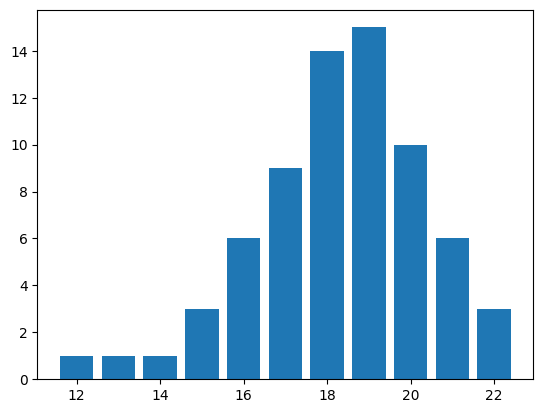

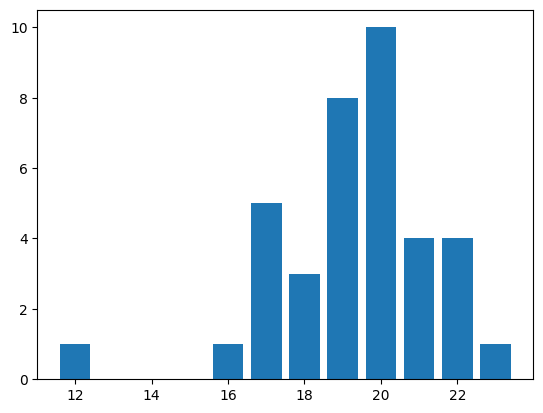

In [54]:

stayed_index = stayed_df[stayed_df["encounter_check"] == "Yes"].index
stayed_freq = {}

for i in stayed_index:
  if stayed_df.at[i, "first_age"] in stayed_freq:
    stayed_freq[stayed_df.at[i, "first_age"]] += 1
  else:
    stayed_freq[stayed_df.at[i, "first_age"]] = 1

moved_index = moved_df[moved_df["encounter_check"] == "Yes"].index
moved_freq = {}

for i in moved_index:
  if moved_df.at[i, "first_age"] in moved_freq:
    moved_freq[moved_df.at[i, "first_age"]] += 1
  else:
    moved_freq[moved_df.at[i, "first_age"]] = 1

plt.bar(height = list(moved_freq.values()), x = list(moved_freq.keys()))
plt.show()
plt.bar(height = list(stayed_freq.values()), x = list(stayed_freq.keys()))
plt.show()




They look like normal, so we can do t-test

In [55]:
moved_group_age = np.array(moved_df[moved_df["encounter_check"] == "Yes"]["first_age"])
stayed_group_age = np.array(stayed_df[stayed_df["encounter_check"] == "Yes"]["first_age"])

print(np.var(stayed_group_age), np.var(moved_group_age))


4.208911614317019 4.176853602184415


So its less than 4:1, so we can proceed with t-test

In [56]:
stats.ttest_ind(a=stayed_group_age, b=moved_group_age, equal_var=True)

Ttest_indResult(statistic=2.393044423871248, pvalue=0.0185024758783401)

So both means are not same, so alternate true. So, means are different. So, moving out does have effect

In [57]:
print(np.mean(moved_group_age), np.mean(stayed_group_age))

18.28985507246377 19.2972972972973


so moved poeple earlier

In [58]:
non_consensual_df = sample_df[sample_df["first_consent"] == "No"]

In [59]:
non_consensual_df[["gender", "current_state", "first_age", "first_nat", "first_contra"]]

,gender,current_state,first_age,first_nat,first_contra
117,Male,WB,22.0,NaN,NaN
119,Female,WB,18.0,"Penetrative, Oral, Genital simulation by hand",Did not use
127,Female,WB,16.0,"Oral, Genital simulation by hand",Did not use
221,Male,WB,12.0,Genital simulation by hand,Did not use
244,Male,UP,20.0,"Penetrative, Oral, Genital simulation by hand",Did not use
246,Female,UP,10.0,Genital simulation by hand,Did not use
256,Female,UP,19.0,Genital simulation by hand,Did not use
267,Female,UP,18.0,Penetrative,"Did not use, Condom ( for penetrative / anal sex)"


First Sex Nature

In [60]:
yes_sample_df = sample_df[sample_df["encounter_check"] == "Yes"]
yes_sample_df.replace(np.nan, "Prefer not to say", inplace=True)

up_first_nat, wb_first_nat = {}, {}
up_first_nat_index = yes_sample_df[yes_sample_df["current_state"] == "UP"].index
wb_first_nat_index = yes_sample_df[yes_sample_df["current_state"] == "WB"].index

for i in up_first_nat_index:
  for j in (str(yes_sample_df.at[i, "first_nat"])).strip(" ").split(","):
    if j in up_first_nat:
      up_first_nat[j] += 1
    else:
      up_first_nat[j] = 1

del up_first_nat['less than penetration']
del up_first_nat[' included something oral']
del up_first_nat[' Pussy eating' ]

for i in wb_first_nat_index:
  for j in (str(yes_sample_df.at[i, "first_nat"])).strip(" ").split(","):
    if j in wb_first_nat:
      wb_first_nat[j] += 1
    else:
      wb_first_nat[j] = 1
del wb_first_nat[' Foreplay'] 

up_first_nat_new = {}
wb_first_nat_new = {}

for i in up_first_nat.keys():
  if (str(i).strip() in up_first_nat_new):
    up_first_nat_new[str(i).strip()] += up_first_nat[i]
  else:
    up_first_nat_new[str(i).strip()] = up_first_nat[i]

for i in wb_first_nat.keys():
  if (str(i).strip() in wb_first_nat_new):
    wb_first_nat_new[str(i).strip()] += wb_first_nat[i]
  else:
    wb_first_nat_new[str(i).strip()] = wb_first_nat[i]

print("West bengal" , wb_first_nat_new)
print("UP" , up_first_nat_new)

  

West bengal {'Oral': 19, 'Genital simulation by hand': 27, 'Penetrative': 13, 'Prefer not to say': 2}
UP {'Penetrative': 34, 'Genital simulation by hand': 39, 'Oral': 28, 'Prefer not to say': 1}


<ipython-input-60-74634cfbd1ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



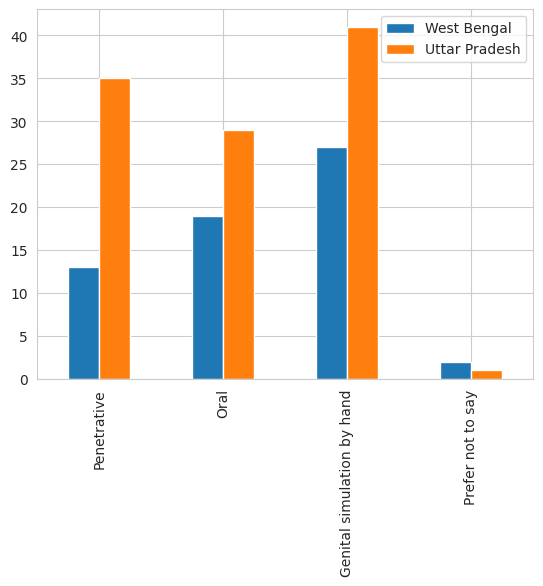

In [61]:
sns.set_style("whitegrid")
d = { "West Bengal" : {'Penetrative': 13, 'Oral': 19, 'Genital simulation by hand': 27,  'Prefer not to say': 2},
     "Uttar Pradesh" : {'Penetrative': 35, 'Oral': 29,'Genital simulation by hand': 41, 'Prefer not to say': 1},}
pd.DataFrame(d).plot(kind='bar')
plt.show()     



Did they use protection if they had sex

WB {'Did not use': 10, 'Condom for oral sex': 2}
WB {'Did not use': 1, 'Condom for penetrative/anal sex': 5, 'Morning after pill': 1}
UP {'Did not use': 17, 'Condom for oral sex': 3}
UP {'Did not use': 4, 'Condom for penetrative/anal sex': 15, 'Morning after pill': 0}


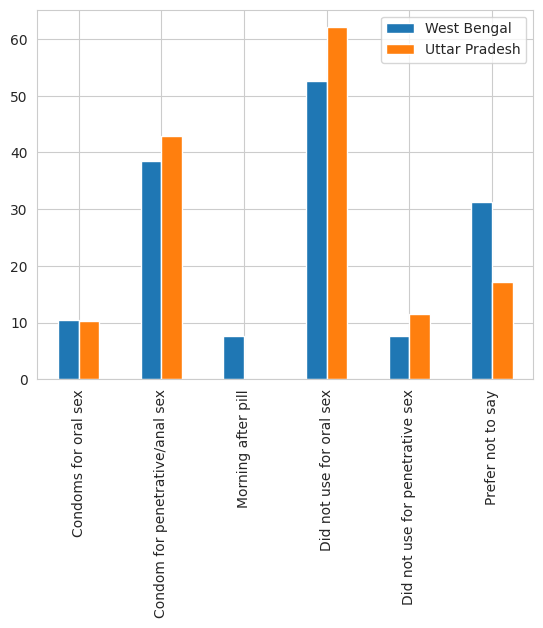

In [62]:
first_oral_wb = {"Did not use":0, "Condom for oral sex":0}
first_penetrative_wb = {"Did not use":0, "Condom for penetrative/anal sex":0, "Morning after pill":0}
first_oral_up = {"Did not use":0, "Condom for oral sex":0}
first_penetrative_up = {"Did not use":0, "Condom for penetrative/anal sex":0, "Morning after pill":0}


for i in yes_sample_df[yes_sample_df["current_state"] == "WB"].index:
  if ("Oral" in str(yes_sample_df.at[i, "first_nat"]).split(",") or " Oral" in str(yes_sample_df.at[i, "first_nat"]).split(",") ):
    if "Did not use" in str(yes_sample_df.at[i,"first_contra"]).split(","):
      first_oral_wb["Did not use"] += 1
    elif 'Condom (For oral sex too)' in str(yes_sample_df.at[i,"first_contra"]).split(",") or ' Condom (For oral sex too)' in str(yes_sample_df.at[i, "first_contra"]).split(",") :
      first_oral_wb["Condom for oral sex"] += 1
  elif ("Penetrative" in str(yes_sample_df.at[i, "first_nat"]).split(",") or " Penetrative" in str(yes_sample_df.at[i, "first_nat"]).split(",") ):
    if "Did not use" in str(yes_sample_df.at[i,"first_contra"]).split(","):
      first_penetrative_wb["Did not use"] += 1
    elif 'Condom ( for penetrative / anal sex)' in str(yes_sample_df.at[i,"first_contra"]).split(",") or ' Condom ( for penetrative / anal sex)' in str(yes_sample_df.at[i, "first_contra"]).split(",") :
      first_penetrative_wb["Condom for penetrative/anal sex"] += 1
    elif ' Morning after pill' in str(yes_sample_df.at[i, "first_contra"]).split(",") or 'Morning after pill' in str(yes_sample_df.at[i, "first_contra"]).split(","):
      first_penetrative_wb["Morning after pill"] += 1

for i in yes_sample_df[yes_sample_df["current_state"] == "UP"].index:
  if ("Oral" in str(yes_sample_df.at[i, "first_nat"]).split(",") or " Oral" in str(yes_sample_df.at[i, "first_nat"]).split(",") ):
    if "Did not use" in str(yes_sample_df.at[i,"first_contra"]).split(","):
      first_oral_up["Did not use"] += 1
    elif 'Condom (For oral sex too)' in str(yes_sample_df.at[i,"first_contra"]).split(",") or ' Condom (For oral sex too)' in str(yes_sample_df.at[i, "first_contra"]).split(",") :
      first_oral_up["Condom for oral sex"] += 1
  elif ("Penetrative" in str(yes_sample_df.at[i, "first_nat"]).split(",") or " Penetrative" in str(yes_sample_df.at[i, "first_nat"]).split(",") ):
    if "Did not use" in str(yes_sample_df.at[i,"first_contra"]).split(","):
      first_penetrative_up["Did not use"] += 1
    elif 'Condom ( for penetrative / anal sex)' in str(yes_sample_df.at[i,"first_contra"]).split(",") or ' Condom ( for penetrative / anal sex)' in str(yes_sample_df.at[i, "first_contra"]).split(",") :
      first_penetrative_up["Condom for penetrative/anal sex"] += 1
    elif ' Morning after pill' in str(yes_sample_df.at[i, "first_contra"]).split(",") or 'Morning after pill' in str(yes_sample_df.at[i, "first_contra"]).split(","):
      first_penetrative_up["Morning after pill"] += 1
print("WB", first_oral_wb)
print("WB", first_penetrative_wb)
print("UP", first_oral_up)
print("UP", first_penetrative_up)

d = {"West Bengal":{"Condoms for oral sex":2/19*100, 'Condom for penetrative/anal sex': 5/13*100, 'Morning after pill': 1/13*100, "Did not use for oral sex":10/19*100, "Did not use for penetrative sex":1/13*100, "Prefer not to say":10/32*100},
     "Uttar Pradesh":{"Condoms for oral sex":3/29*100, 'Condom for penetrative/anal sex': 15/35*100, 'Morning after pill': 0/35*100, "Did not use for oral sex":18/29*100, "Did not use for penetrative sex":4/35*100, "Prefer not to say":11/64*100}}

pd.DataFrame(d).plot(kind='bar')
plt.show()     



In [63]:
yes_sample_1 = yes_sample_df.replace("Prefer not to say", np.nan)

In [64]:
yes_sample_1

,timestamp,age,gender,sex_orient,domicile,current_home,encounter_check,first_age,first_consent,first_nat,...,fluids_check,oral_aware,preg_aware,cut_aware,menstrual_aware,safe_sex_source,risk_count,Unnamed: 27,domicile_state,current_state
2,2-15-2023 19:34:24,20.0,Male,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,17.0,Yes,Penetrative,...,No,No,Yes,No,No,Friends and partner,"HIV, Hepatitis, Bacterial transmission through...",NaN,UP,UP
3,2-15-2023 19:34:46,21.0,Male,Heterosexual / Straight,"Aligarh, UP","Varanasi, UP",Yes,17.0,Yes,"less than penetration, included something oral",...,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Herpes, Hepatitis, ...",NaN,UP,UP
5,2-15-2023 19:40:17,20.0,Male,Heterosexual / Straight,"Bokaro Steel City, Jharkhand","Varanasi , UP",Yes,20.0,Yes,Penetrative,...,No,No,Yes,Yes,Yes,School/ College level sex education in books,"HIV, Syphillis",NaN,Jharkhand,UP
18,2-15-2023 20:22:50,22.0,Male,Heterosexual / Straight,"sonbhadra, UP","Varanasi, UP",Yes,21.0,Yes,Penetrative,...,Yes,Yes,Yes,No,Yes,"Social Media, Friends and partner, You regular...","HIV, Hepatitis, Urinary tract infections occur...",NaN,UP,UP
21,2-15-2023 20:25:57,19.0,Male,Heterosexual / Straight,"Katni, MP","Varanasi, UP",Yes,19.0,Yes,Genital simulation by hand,...,Yes,Yes,Yes,Yes,Yes,"Social Media, Friends and partner, You regular...","HIV, Hepatitis, Urinary tract infections occur...",NaN,MP,UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2-26-2023 11:05:49,19.0,Female,Heterosexual / Straight,"Ghazipur, UP","Kolkata,WB",Yes,18.0,Yes,Oral,...,Maybe,Maybe,Yes,No,Yes,You regularly read about it,"HIV, Hepatitis, Urinary tract infections occur...",NaN,UP,WB
291,2-26-2023 11:30:25,23.0,Male,Heterosexual / Straight,"Varanasi, UP","Varanasi, UP",Yes,22.0,Yes,"Oral, Genital simulation by hand",...,Yes,Yes,Yes,Yes,Yes,"School/ College level sex education in books, ...","HIV, Syphillis, Gonorhhea, Chlamydia, Herpes, ...",NaN,UP,UP
300,2-26-2023 21:49:35,21.0,Female,Heterosexual / Straight,"Varansi, UP","Varansi, UP",Yes,20.0,Yes,Penetrative,...,No,Yes,Yes,Yes,Yes,"Social Media, Friends and partner, You regular...","HIV, Syphillis, Chlamydia, Urinary tract infec...",NaN,UP,UP
305,03-05-23 0:08,23.0,Female,Heterosexual / Straight,"Lucknow, UP","Varanasi, UP",Yes,21.0,Yes,"Penetrative, Oral, Genital simulation by hand",...,Yes,No,Yes,Yes,Yes,"Friends and partner, You regularly read about it","HIV, Chlamydia, Hepatitis, Urinary tract infec...",NaN,UP,UP


In [65]:
yes_sample_1["total_no"].corr(yes_sample_1["skip_freq"], method ="kendall")

0.13106932126820056

In [66]:
yes_sample_1["current_no"].corr(yes_sample_1["skip_freq"], method="kendall")

0.06562173569788532

In [67]:
up_skip_rsn, wb_skip_rsn = {}, {}
up_sourceindex = yes_sample_df[yes_sample_df["current_state"] == "UP"].index
wb_sourceindex = yes_sample_df[yes_sample_df["current_state"] == "WB"].index

for i in up_sourceindex:
  for j in (str(yes_sample_df.at[i, "skip_reason"])).strip(" ").split(","):
    if j in up_skip_rsn:
      up_skip_rsn[j] += 1
    else:
      up_skip_rsn[j] = 1

for i in wb_sourceindex:
  for j in (str(yes_sample_df.at[i, "skip_reason"])).strip(" ").split(","):
    if j in wb_skip_rsn:
      wb_skip_rsn[j] += 1
    else:
      wb_skip_rsn[j] = 1

wb_skip_rsn

{'Prefer not to say': 16,
 'Unavailibilty': 3,
 ' We find it expensive even for infrequent usage': 1,
 'We find it expensive even for infrequent usage': 2,
 " We skip it at the end of mine / my partner's menstrual cycle": 2,
 'My partner finds a reduction in pleasure on using it': 2,
 "We don't have sexual encounters of penetrative nature.": 1,
 'My partner finds it unncessary': 1,
 ' My partner finds a reduction in pleasure on using it': 5,
 ' I / My partner partner prefers methods like withdrawal (pull out)': 4,
 'I find it unnecessary': 4,
 ' My partner finds it unncessary': 2,
 ' I find a reduction in pleasure on using it': 4,
 ' I / my partner am on birth control': 1,
 "It's usually unplanned": 5,
 ' Can find a bigger condom. The small onces are very uncomfortable.': 1,
 'I / My partner partner prefers methods like withdrawal (pull out)': 2,
 " It's usually unplanned": 2,
 'I / my partner am on birth control': 1,
 'We only do oral sex': 1,
 'I am infertile therefore': 1,
 ' we pla

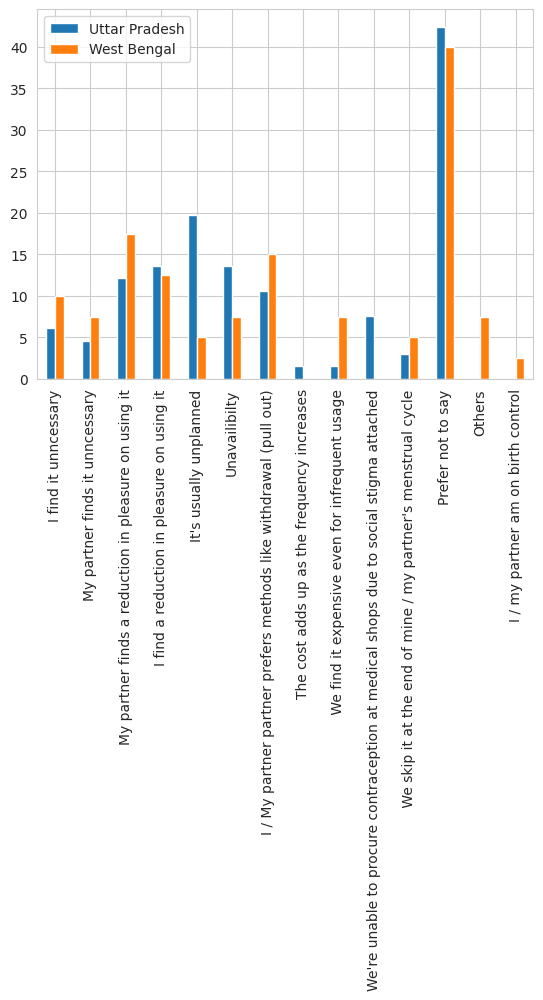

In [68]:
d = {"Uttar Pradesh": {"I find it unncessary": 4/66*100,
                       "My partner finds it unncessary": 3/66*100,
                       "My partner finds a reduction in pleasure on using it": 8/66*100,
                       "I find a reduction in pleasure on using it": 9/66*100,
                       "It's usually unplanned": 13/66*100,
                       "Unavailibilty": 9/66*100,
                       "I / My partner partner prefers methods like withdrawal (pull out)": 7/66*100,
                       'The cost adds up as the frequency increases': 1/66*100,
                       ' We find it expensive even for infrequent usage': 1/66*100,
                        "We're unable to procure contraception at medical shops due to social stigma attached": 5/66*100,
                       " We skip it at the end of mine / my partner's menstrual cycle": 2/66*100,
                       "Prefer not to say" : 28/66*100,
                       "Others": 0/66*100,
                     'I / my partner am on birth control': 0},
     "West Bengal": { "I find it unncessary": 4/40*100,
                       "My partner finds it unncessary": 3/40*100,
                       "My partner finds a reduction in pleasure on using it": 7/40*100,
                       "I find a reduction in pleasure on using it": 5/40*100,
                       "It's usually unplanned": 2/40*100,
                       "Unavailibilty": 3/40*100,
                       "I / My partner partner prefers methods like withdrawal (pull out)": 6/40*100,
                       'The cost adds up as the frequency increases': 0/40*100,
                       ' We find it expensive even for infrequent usage': 3/40*100,
                        "We're unable to procure contraception at medical shops due to social stigma attached": 0/40*100,
                       " We skip it at the end of mine / my partner's menstrual cycle": 2/40*100,
                       "Prefer not to say" : 16/40*100,
                     "Others": 3/40*100,
                     'I / my partner am on birth control': 1/40*100, 
                     "We're unable to procure contraception at medical shops due to social stigma attached": 0/40*100
                     }}
pd.DataFrame(d).plot(kind='bar')
plt.show()     


In [69]:
up_source, wb_source = {}, {}
up_sourceindex = yes_sample_df[yes_sample_df["current_state"] == "UP"].index
wb_sourceindex = yes_sample_df[yes_sample_df["current_state"] == "WB"].index

for i in up_sourceindex:
  for j in (str(yes_sample_df.at[i, "contra_source"])).strip(" ").split(","):
    if j in up_source:
      up_source[j] += 1
    else:
      up_source[j] = 1

for i in wb_sourceindex:
  for j in (str(yes_sample_df.at[i, "contra_source"])).strip(" ").split(","):
    if j in wb_source:
      wb_source[j] += 1
    else:
      wb_source[j] = 1

up_source

{'We buy it online': 7,
 'never needed it as there wasnt actual penetration': 1,
 ' but i have bought condoms and other things for people': 1,
 'I buy it myself from medical stores': 26,
 'We get it from our friends': 1,
 'Single hu bc': 1,
 'My partner brings it': 16,
 'Prefer not to say': 5,
 'Never got it': 1,
 'I do not use protection.': 1,
 ' We get it from our friends': 2,
 "i don't have a partner now": 1,
 ' We buy it online': 6,
 "I haven't used contraceptives yet": 1,
 ' but will do it in future': 1,
 "We don't buy": 1,
 'Abhi Tak bas ek baar kiya hu': 1,
 'Not afraid to buy it from a store but i will look around for any known people given the fact that i am still young and specially the nature of indian relatives to avoid any sort of chaos .Would prefer buying it online if i have it pre-planned and theres no emergency': 1,
 'None': 2,
 ' My partner brings it': 1}

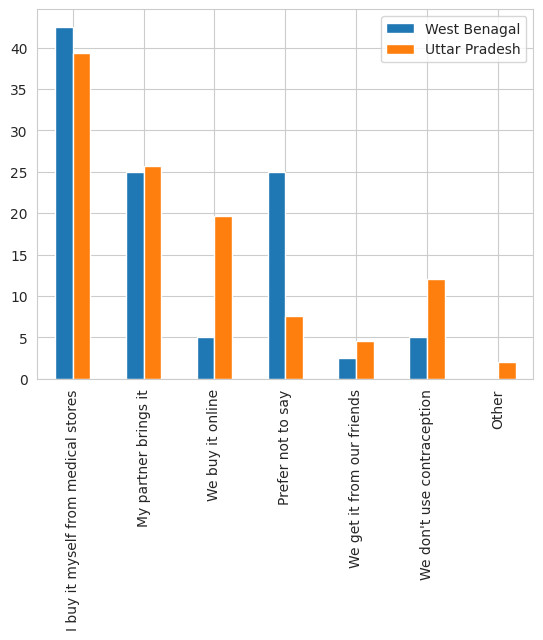

In [70]:
d = {"West Benagal" : {'I buy it myself from medical stores': 17/40*100,
 'My partner brings it': 10/40*100,
 'We buy it online': 2/40*100,
 'Prefer not to say': 10/40*100,
 'We get it from our friends': 1/40*100,
 "We don't use contraception": 2/40*100, 
 "Other" : 0/40*100},

 "Uttar Pradesh" : {'We buy it online': 13/66*100,
 'I buy it myself from medical stores': 26/66*100,
 'We get it from our friends': 3/66*100,
 'My partner brings it': 17/66*100,
 'Prefer not to say': 5/66*100,
 'Other': 1/66*100/73*100,
 "We don't use contraception": 8/66*100}}

pd.DataFrame(d).plot(kind='bar')
plt.show()    

In [71]:
yes_sample_df[yes_sample_df["current_state"] == "WB"].count()

timestamp          40
age                40
gender             40
sex_orient         40
domicile           40
current_home       40
encounter_check    40
first_age          40
first_consent      40
first_nat          40
first_contra       40
contra_source      40
total_no           40
current_no         40
current_freq       40
current_contra     40
skip_freq          40
skip_reason        40
alcohol_check      40
conceive_check     40
fluids_check       40
oral_aware         40
preg_aware         40
cut_aware          40
menstrual_aware    40
safe_sex_source    40
risk_count         40
Unnamed: 27        40
domicile_state     40
current_state      40
dtype: int64

In [72]:
up_risk, wb_risk = {}, {}
up_riskindex = yes_sample_df[yes_sample_df["current_state"] == "UP"].index
wb_riskindex = yes_sample_df[yes_sample_df["current_state"] == "WB"].index

for i in up_riskindex:
  for j in (str(yes_sample_df.at[i, "risk_count"])).strip(" ").split(","):
    if j in up_risk:
      up_risk[j] += 1
    else:
      up_risk[j] = 1

for i in wb_riskindex:
  for j in (str(yes_sample_df.at[i, "risk_count"])).strip(" ").split(","):
    if j in wb_risk:
      wb_risk[j] += 1
    else:
      wb_risk[j] = 1

wb_risk

{'HIV': 39,
 ' Hepatitis': 25,
 'Urinary tract infections occurring from transmission of bacteria from urethral/anal openings': 1,
 ' Syphillis': 22,
 ' Gonorhhea': 17,
 ' Urinary tract infections occurring from transmission of bacteria from urethral/anal openings': 28,
 ' Bacterial transmission through oral genital contact': 26,
 ' HPV': 18,
 ' Chlamydia': 16,
 ' Herpes': 23,
 ' Shigella transmitted through fecal-oral contact': 6,
 ' H-pylori transmission': 5,
 ' Kissing syndrome (Epstein Barr virus)': 1,
 '': 2}

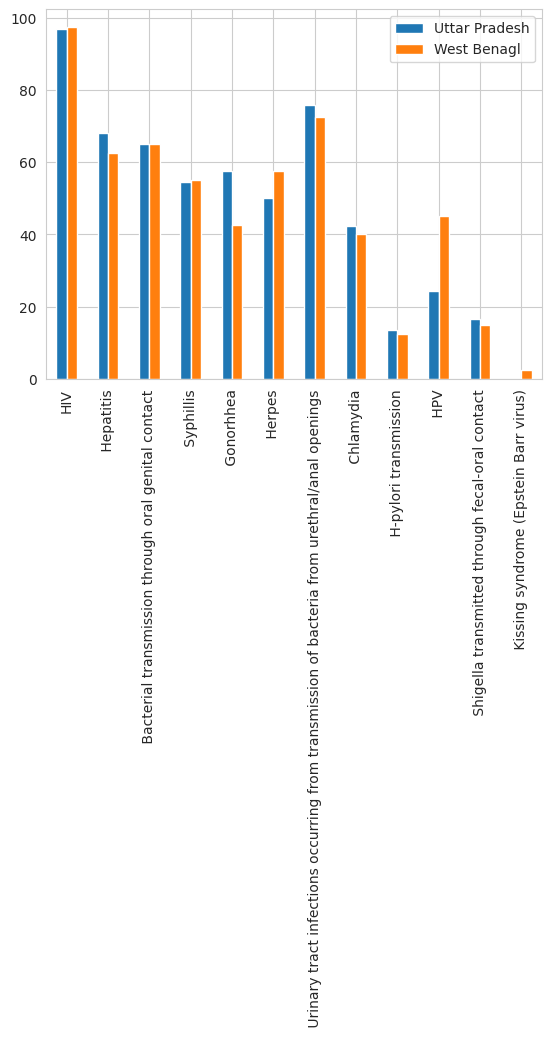

In [73]:
d = {"Uttar Pradesh" : {'HIV': 64/66*100,
 ' Hepatitis': 45/66*100,
 ' Bacterial transmission through oral genital contact': 43/66*100,
 ' Syphillis': 36/66*100,
 ' Gonorhhea': 38/66*100,
 ' Herpes': 33/66*100,
 ' Urinary tract infections occurring from transmission of bacteria from urethral/anal openings': 50/66*100,
 ' Chlamydia': 28/66*100,
 ' H-pylori transmission': 9/66*100,
 ' HPV': 16/66*100,
 ' Shigella transmitted through fecal-oral contact': 11/66*100} , 
 
 "West Benagl": {'HIV': 39/40*100,
 ' Hepatitis': 25/40*100,
 ' Urinary tract infections occurring from transmission of bacteria from urethral/anal openings': 29/40*100,
 ' Syphillis': 22/40*100,
 ' Gonorhhea': 17/40*100,
 ' Bacterial transmission through oral genital contact': 26/40*100,
 ' HPV': 18/40*100,
 ' Chlamydia': 16/40*100,
 ' Herpes': 23/40*100,
 ' Shigella transmitted through fecal-oral contact': 6/40*100,
 ' H-pylori transmission': 5/40*100,
 ' Kissing syndrome (Epstein Barr virus)': 1/40*100} }

pd.DataFrame(d).plot(kind='bar')
plt.show() 

Now testing hypothsesis that male peole prefer their own pleasre more than female